In [21]:
from sklearn.cluster import KMeans
from sklearn import decomposition
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize


# Custom csv processor for importing data from csv
import utility.csv_process as reader

# Numpy for matrix manipulation
import numpy as np

# For 2d graphing
from matplotlib import pyplot as plt

# For building paths
from os import path

In [22]:
#read csvs

rw_6 = np.array(reader.cont_read(path.join('data', 'log_gait_6_RW.csv')), dtype = 'float64')
vr_6 = np.array(reader.cont_read(path.join('data', 'log_gait_6_VR.csv')), dtype = 'float64')

rw_7 = np.array(reader.cont_read(path.join('data', 'log_gait_7_RW.csv')), dtype = 'float64')
vr_7 = np.array(reader.cont_read(path.join('data', 'log_gait_7_VR.csv')), dtype = 'float64')



In [23]:
stacked_data = np.vstack((rw_6, vr_6, rw_7, vr_7))
data = np.around(normalize(stacked_data, axis = 0, norm = 'max'), decimals = 15)
print(data.shape)

(10528, 100)


In [29]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [31]:
pca = decomposition.PCA(n_components=2)

components = pca.fit_transform(data)
components.shape

(10528, 2)

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

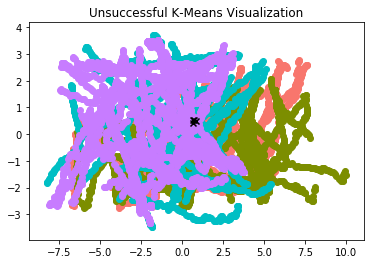

In [34]:
for i in range(0,len(components)):
    # plot the data observations
    if i < len(rw_6):
        color = '#F8766D'
    elif i < len(rw_6)+len(vr_6):
        color = '#7C8E00'
    elif i < len(rw_6)+len(vr_6)+len(rw_7):
        color = '#00BFC4'
    else: color = '#C77CFF'
        
    plt.scatter(components[i,0],components[i,1], c = color)
# plot the centroids    
for i in range(k):
    plt.scatter(centroids[i,0],centroids[i,1], c = 'k', marker = 'x')
plt.title("Unsuccessful K-Means Visualization")
plt.show()